### Atindra Jayakar I023 B1 
Signal and Image Processing Experiment 2 
Image Downsampling and Spatial Resolution

In [180]:
# grey scale resolution and sampling resolution
# https://www.imageprocessingplace.com/root_files_V3/image_databases.htm
# 3rd download - "Standard"

In [181]:
# Importing required libreries for image processing 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

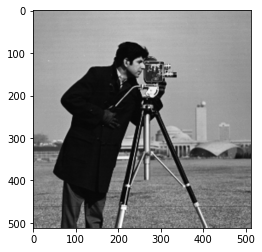

In [182]:
image = cv2.imread("cameraman.tif",0) # addded zero to read as greyscale with no plane (512,512,0) else 3 for RGB
# cv2_imshow(image)
plt.imshow(image, cmap="gray");

In [183]:
image.shape # number of pixels in the image 512x512

(512, 512)

In [184]:
image.size # size of the image in bits

262144

In [185]:
type(image) # image data stored as an n-dimentional array

numpy.ndarray

In [186]:
image

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

Image Downsampling

In [187]:
scaling = int(input("Enter down sampling factor: "))
down_image = image[::scaling,::scaling]
down_image.shape

Enter down sampling factor: 4


(128, 128)

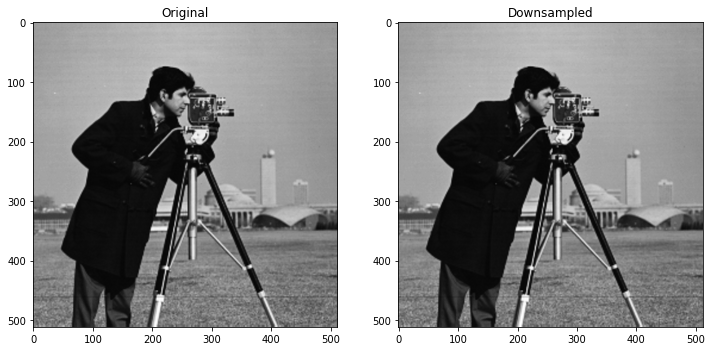

In [188]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap="gray")
ax.set_title('Original')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(image, cmap="gray")
ax.set_title('Downsampled');


###Image Upsampling

By inserting zero values in the middle

In [211]:
def insert_zeros(down_image, n):
    out = np.zeros( (n+1)*np.array(down_image.shape),dtype=down_image.dtype)
    out[::n+1,::n+1] = down_image
    return out
up_image2 = insert_zeros(down_image,1)

By repeating rows and columns in the image matrix

In [208]:
a = down_image           # input array - 3x3
smapling_factor =2
up_image = np.zeros([down_image.shape[0]*smapling_factor,down_image.shape[1]*smapling_factor])

# Loop, filling A with tiled values of a at each index
for i,l in enumerate(down_image):                   # lines in a
    for j,aij in enumerate(l):             # a[i,j]
        up_image[smapling_factor*i:smapling_factor*(i+1),smapling_factor*j:smapling_factor*(j+1)] = aij

up_image

array([[156., 156., 158., ..., 153., 151., 151.],
       [156., 156., 158., ..., 153., 151., 151.],
       [158., 158., 157., ..., 154., 153., 153.],
       ...,
       [111., 111., 117., ..., 100., 126., 126.],
       [116., 116., 126., ..., 136., 134., 134.],
       [116., 116., 126., ..., 136., 134., 134.]])

In [209]:
# up_image2 = np.zeros(up_image.shape)
# for i in range(0,int(up_image.shape[0])-1):
#   up_image2[i+1] = up_image[i]
# print(up_image2)

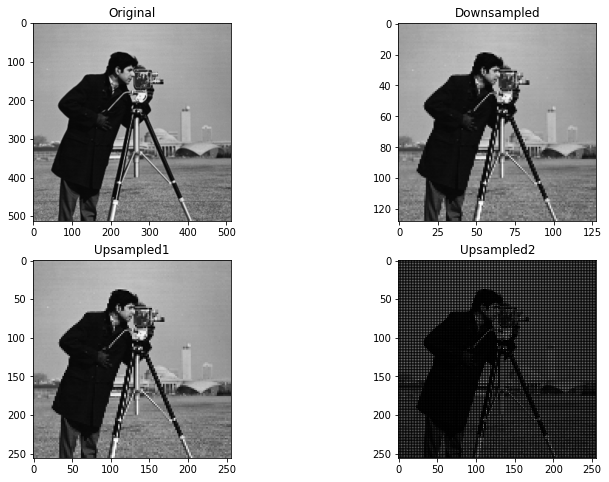

In [212]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(image, cmap="gray")
ax.set_title('Original')
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(down_image, cmap="gray")
ax.set_title('Downsampled');
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(up_image, cmap="gray")
ax.set_title('Upsampled1');
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(up_image2, cmap="gray")
ax.set_title('Upsampled2');

### Gray Scale Resoulution

In [216]:
k =  8 #original image color depth
b =  int(input(f"Current color depth (no. of bits) {k}, new required : ")) #required image color depth
gray_scaled = np.round(((pow(2,b)-1) / (pow(2,k)-1)) * image ) # using mapping formula then rounding to get desired valeus
print(gray_scaled)

Current color depth (no. of bits) 8, new required : 3
[[4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]


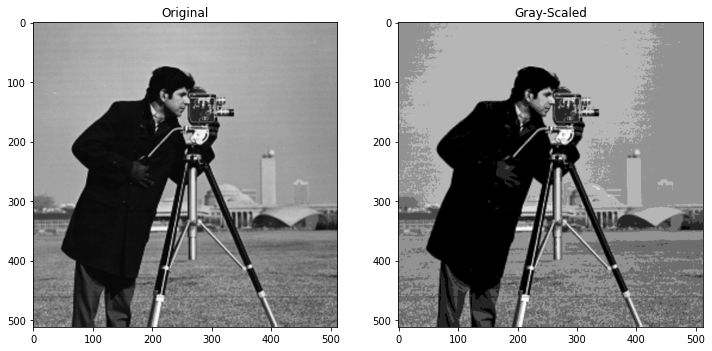

In [217]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap="gray")
ax.set_title('Original')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gray_scaled, cmap="gray")
ax.set_title('Gray-Scaled');